In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, CSVLogger

In [3]:
from data import load_data, load_train_and_test
from model import build_unet

In [4]:
(X_train, y_train), (X_test, y_test) = load_train_and_test()
print(f"Dataset: Train: {len(X_train)} - Test: {len(X_test)}")

Dataset: Train: 50000 - Test: 10000


In [5]:
model = tf.keras.models.load_model("model.h5") 

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

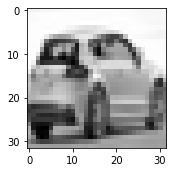

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(X_test[131], cmap="gray")
y_test[131]

In [7]:
result = model.predict(np.expand_dims(X_test[131], axis=0))

In [8]:
result.argmax()

9

In [14]:
result = model.predict(X_test)

In [16]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [18]:
total_pred = len(X_test)
true_pred = 0

for i in range(total_pred):
    if y_test[i].argmax() == result[i].argmax():
        true_pred += 1

In [22]:
df = pd.DataFrame(columns=['Quality', 'Quantity'])

In [31]:
df = df.append({'Quality': "Total Predictions", 'Quantity': total_pred}, ignore_index=True)

C:\Users\Harsh Mohan\AppData\Local\Temp\ipykernel_40856\424971235.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Quality': "Total Predictions", 'Quantity': total_pred}, ignore_index=True)


In [29]:
df.to_csv('accuracy.csv', index=False)

In [32]:
df

,Quality,Quantity
0,Total Predictions,10000


In [12]:
result[131].argmax()

9

In [13]:
y_test[131].argmax()

1